In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
path = r'C:\Users\kuohe\ClimateWins\02 Data'

In [3]:
col_names = ['Id','sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df_iris = pd.read_csv(os.path.join(path, 'iris.csv'), index_col = False, header=None, names=col_names)

In [4]:
df_iris.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


In [6]:
# Define a dictionary mapping species names to numerical codes
iris_class = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

# Map species names to codes
df_iris['species_code'] = df_iris['species'].map(iris_class)


In [7]:
df_iris

,Id,sepal_length,sepal_width,petal_length,petal_width,species,species_code
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,NaN
1,1,5.1,3.5,1.4,0.2,Iris-setosa,0.0
2,2,4.9,3.0,1.4,0.2,Iris-setosa,0.0
3,3,4.7,3.2,1.3,0.2,Iris-setosa,0.0
4,4,4.6,3.1,1.5,0.2,Iris-setosa,0.0
...,...,...,...,...,...,...,...
146,146,6.7,3.0,5.2,2.3,Iris-virginica,2.0
147,147,6.3,2.5,5.0,1.9,Iris-virginica,2.0
148,148,6.5,3.0,5.2,2.0,Iris-virginica,2.0
149,149,6.2,3.4,5.4,2.3,Iris-virginica,2.0


In [8]:
df_iris = df_iris.drop(index=0).reset_index(drop=True)
df_iris

,Id,sepal_length,sepal_width,petal_length,petal_width,species,species_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2.0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2.0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.0


In [9]:
#subset for plotting the petal data
columns = ['petal_length', 'petal_width', 'species_code']
df2 = df_iris[columns]

In [10]:
df2

,petal_length,petal_width,species_code
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
145,5.2,2.3,2.0
146,5.0,1.9,2.0
147,5.2,2.0,2.0
148,5.4,2.3,2.0


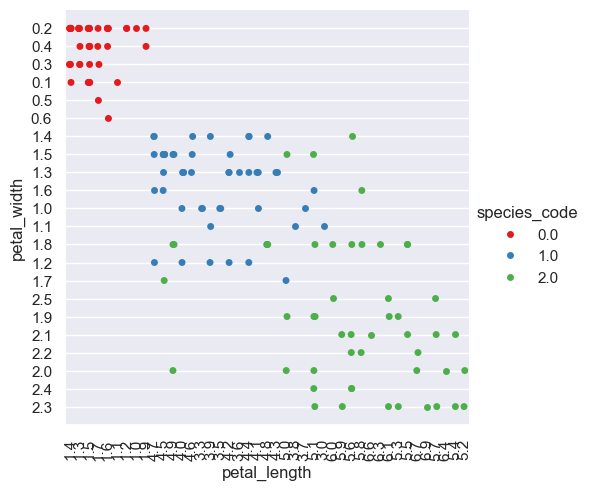

In [12]:
sns.set_theme()
g = sns.catplot(x="petal_length", y="petal_width", hue="species_code", palette='Set1', data=df2)
g.set_xticklabels(rotation=90)

In [13]:
# Convert columns to integer
df_iris['sepal_length'] = pd.to_numeric(df_iris['sepal_length'], errors='coerce').fillna(0).astype('int64')
df_iris['sepal_width'] = pd.to_numeric(df_iris['sepal_width'], errors='coerce').fillna(0).astype('int64')
df_iris['petal_length'] = pd.to_numeric(df_iris['petal_length'], errors='coerce').fillna(0).astype('int64')
df_iris['petal_width'] = pd.to_numeric(df_iris['petal_width'], errors='coerce').fillna(0).astype('int64')

#check the dtypes again
df_iris.dtypes


Id               object
sepal_length      int64
sepal_width       int64
petal_length      int64
petal_width       int64
species          object
species_code    float64
dtype: object

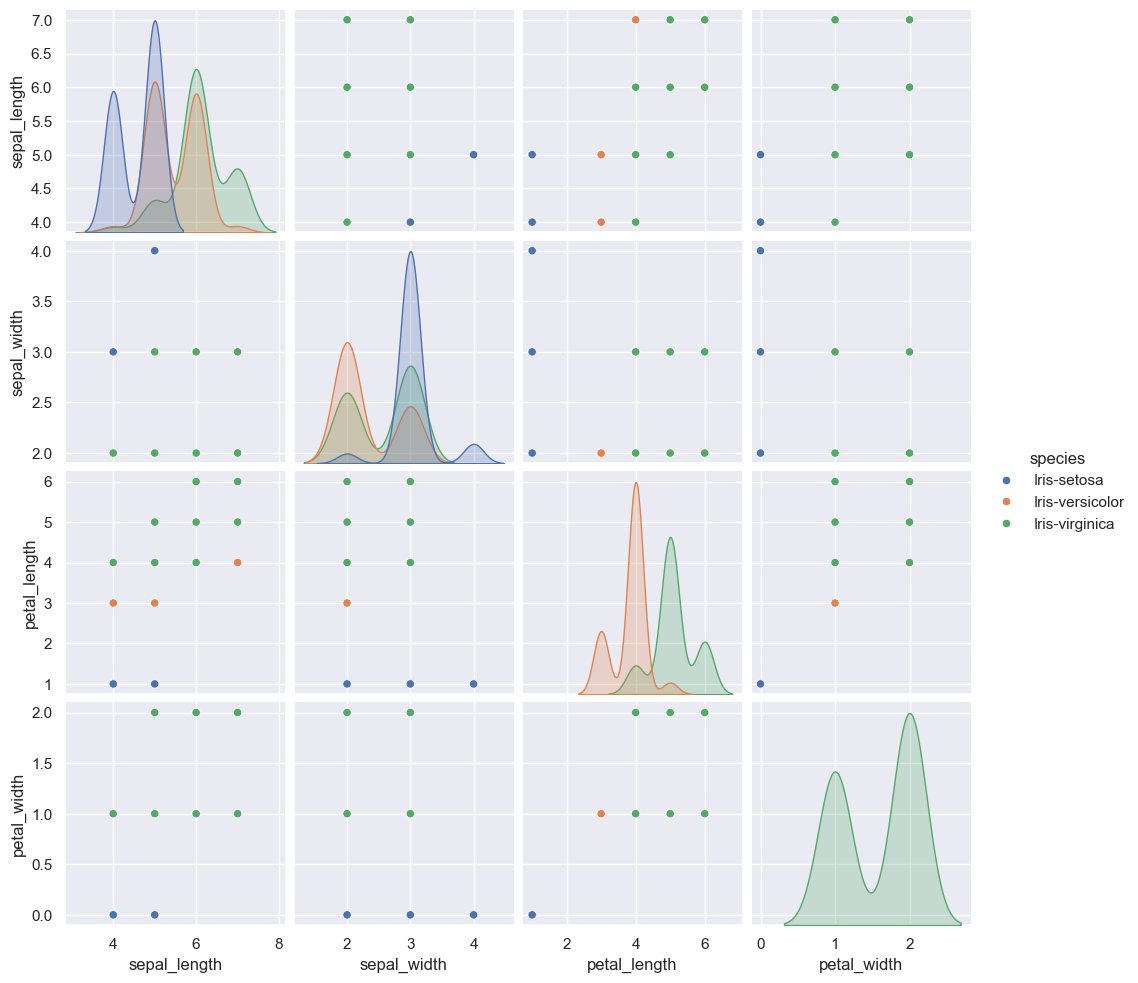

In [14]:
sns.pairplot(df_iris[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']], hue = 'species')
plt.show()

In [15]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_iris.drop(['species', 'species_code'], axis=1)
y = df_iris.species

In [16]:
print(X.shape)
print(y.shape)

(150, 5)
(150,)


In [17]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 5)
(38, 5)
(112,)
(38,)


In [19]:
X_train[:10]

,Id,sepal_length,sepal_width,petal_length,petal_width
4,5,5,3,1,0
32,33,5,4,1,0
142,143,5,2,5,1
85,86,6,3,4,1
86,87,6,3,4,1
16,17,5,3,1,0
10,11,5,3,1,0
81,82,5,2,3,1
133,134,6,2,5,1
137,138,6,3,5,1


In [20]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.69110144 -0.48482485  0.6849525  -1.36325664 -1.25910333]
 [-1.03515906 -0.48482485  2.55604224 -1.36325664 -1.25910333]
 [ 1.54175742 -0.48482485 -1.18613725  0.92415525  0.1947067 ]
 [ 0.20644615  0.72185033  0.6849525   0.35230228  0.1947067 ]
 [ 0.22987266  0.72185033  0.6849525   0.35230228  0.1947067 ]
 [-1.40998328 -0.48482485  0.6849525  -1.36325664 -1.25910333]
 [-1.55054236 -0.48482485  0.6849525  -1.36325664 -1.25910333]
 [ 0.1127401  -0.48482485 -1.18613725 -0.2195507   0.1947067 ]
 [ 1.3309188   0.72185033 -1.18613725  0.92415525  0.1947067 ]
 [ 1.42462485  0.72185033  0.6849525   0.92415525  0.1947067 ]]


In [21]:
#Note the features all have a mean of zero and a standard deviation of one.

In [22]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

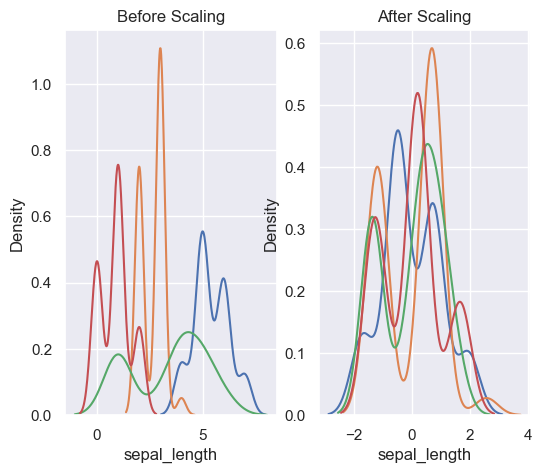

In [23]:
#Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['sepal_length'], ax=ax1)
sns.kdeplot(X_train['sepal_width'], ax=ax1)
sns.kdeplot(X_train['petal_length'], ax=ax1)
sns.kdeplot(X_train['petal_width'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['sepal_length'], ax=ax2)
sns.kdeplot(X_train_df['sepal_width'], ax=ax2)
sns.kdeplot(X_train_df['petal_length'], ax=ax2)
sns.kdeplot(X_train_df['petal_width'], ax=ax2)

plt.show()

In [24]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [25]:
#The ANN has not yet converged on an answer. Let's see how accurate it is.

In [26]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6071428571428571
0.6052631578947368


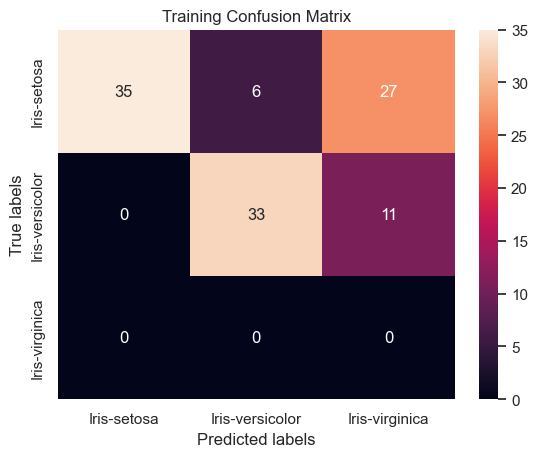

In [27]:
#Confusion matrix
labels = ['Iris-setosa','Iris-versicolor','Iris-virginica',]    

ax= plt.subplot()

#Confusion matrix for training data
cm = confusion_matrix(y_pred, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

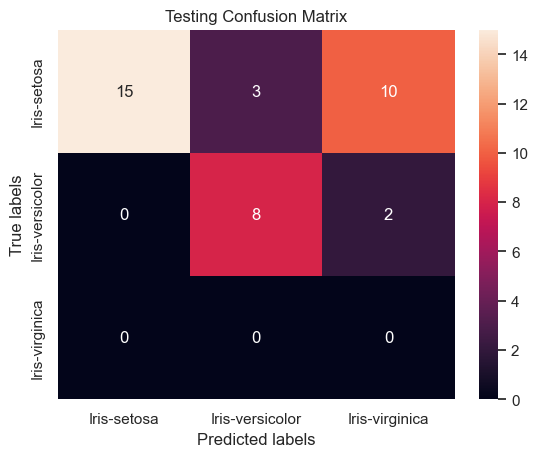

In [28]:
ax= plt.subplot()

#Confusion matrix for testing data
cm = confusion_matrix(y_pred_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Testing Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [29]:
#Not a great answer! let's try a more complicated network

In [30]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [31]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5982142857142857
0.6842105263157895


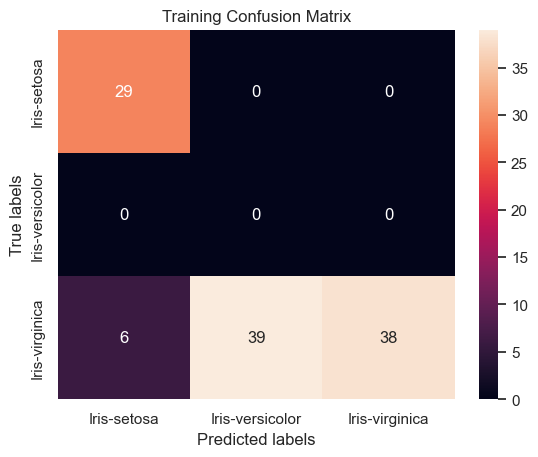

In [32]:
ax= plt.subplot()

#Confusion matrix for training data
cm = confusion_matrix(y_pred, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

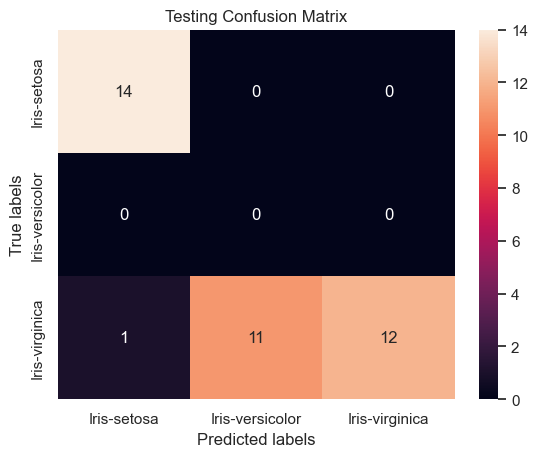

In [33]:
ax= plt.subplot()

#Confusion matrix for testing data
cm = confusion_matrix(y_pred_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Testing Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [34]:
#Better, but it's confusing versicolor for virginica. let's try one more.

In [35]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)

In [36]:
#It converged!

In [37]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.9910714285714286
1.0


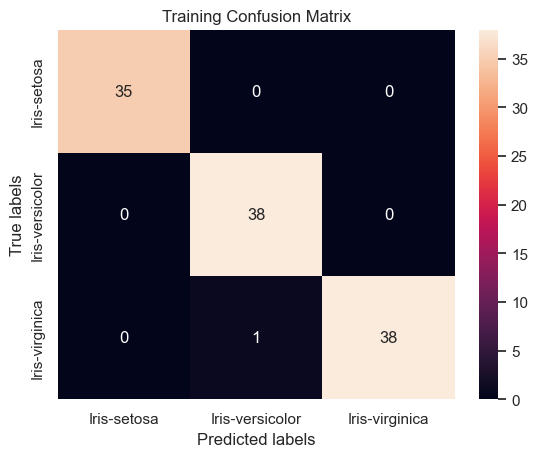

In [38]:
ax= plt.subplot()

#Confusion matrix for training data
cm = confusion_matrix(y_pred, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

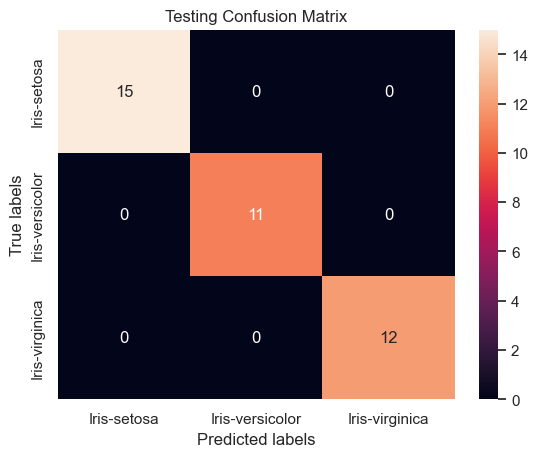

In [39]:
ax= plt.subplot()

#Confusion matrix for testing data
cm = confusion_matrix(y_pred_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Testing Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);